In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc

# Loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

# Explore the dataset

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Distribution of Features

<Figure size 1500x1000 with 0 Axes>

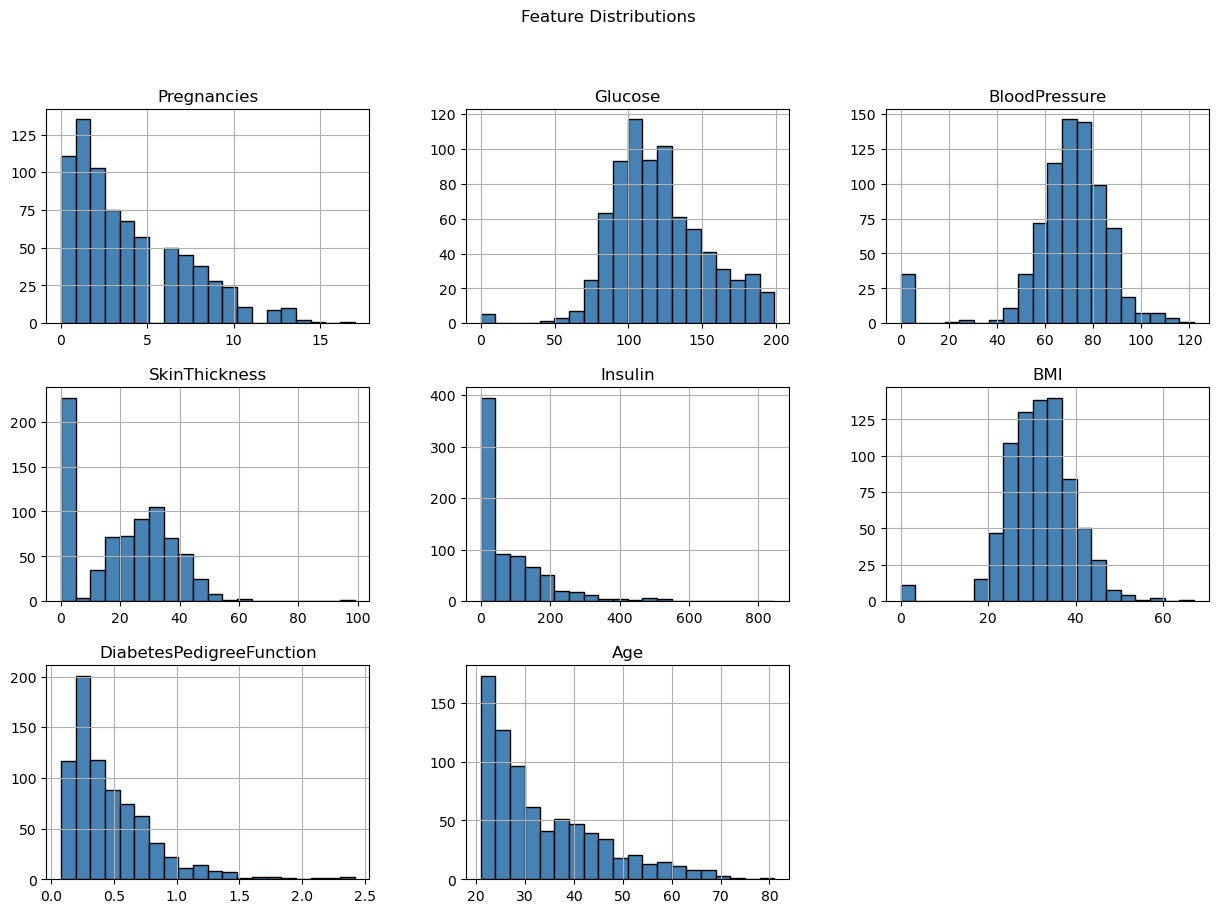

In [6]:
plt.figure(figsize=(15, 10))
data.drop('Outcome', axis=1).hist(bins=20, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Distribution of 'Glucose' Levels

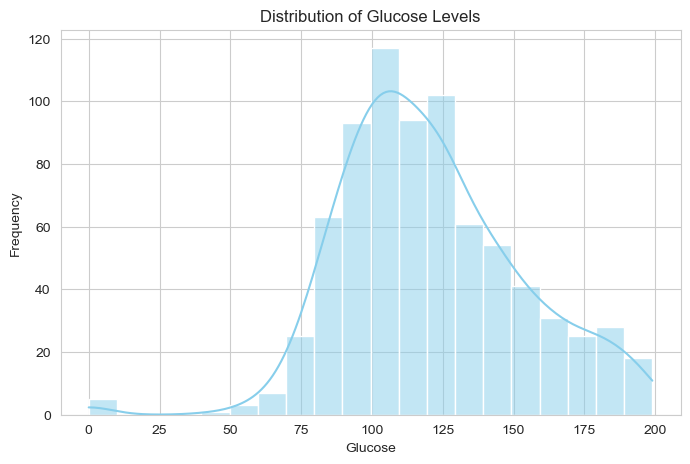

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(data['Glucose'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

#  Scatter Plot: Age vs BMI, colored by Outcome

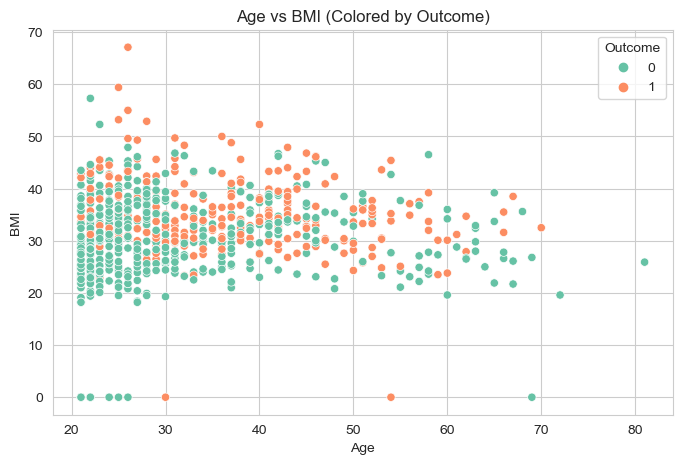

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Age', y='BMI', hue='Outcome', palette='Set2')
plt.title('Age vs BMI (Colored by Outcome)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

#  Box Plot: BMI by Outcome

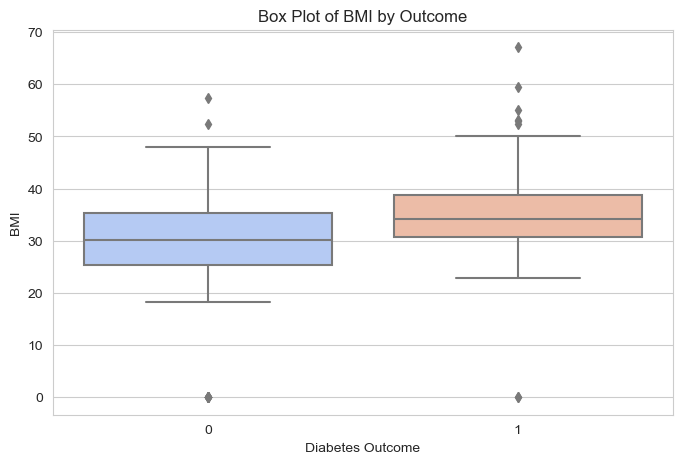

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Outcome', y='BMI', palette='coolwarm')
plt.title('Box Plot of BMI by Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.show()

# Correlation Heatmap

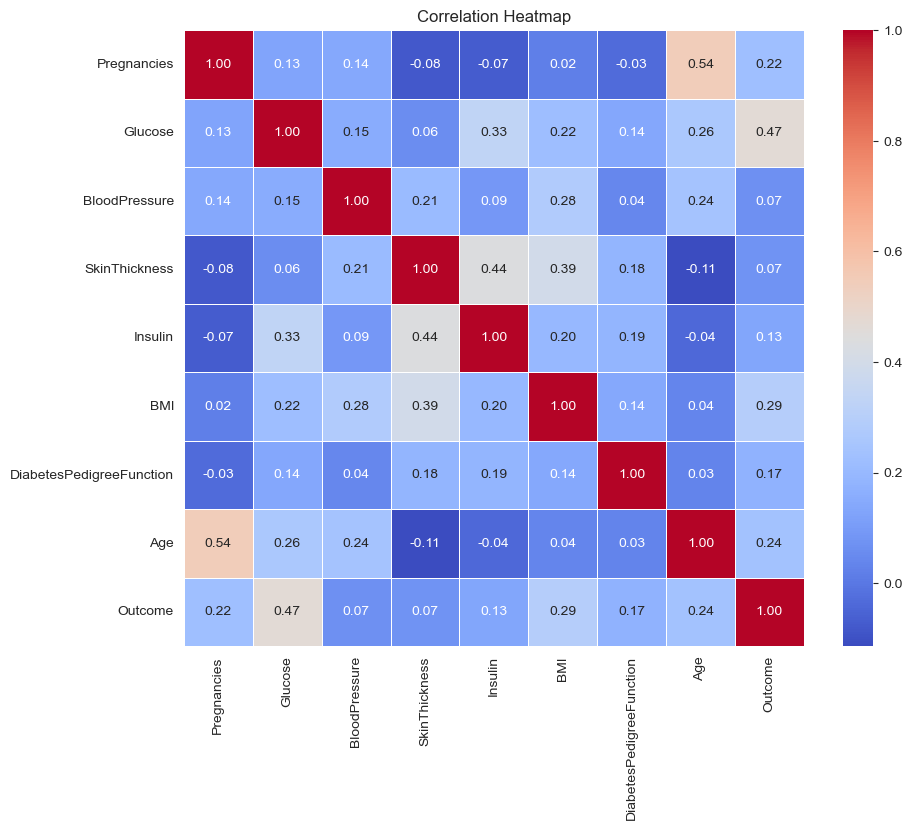

In [10]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot: Selected Features

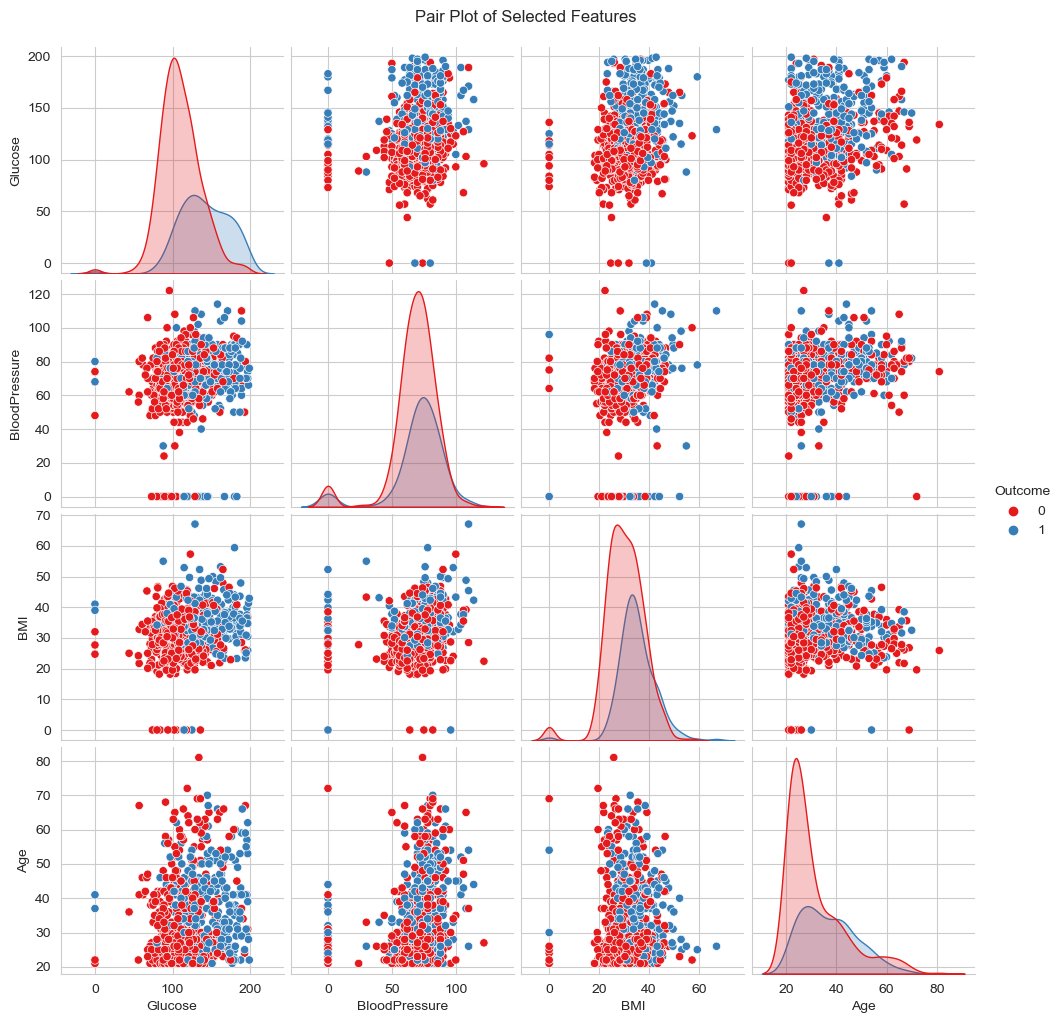

In [11]:
selected_features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']
sns.pairplot(data[selected_features], hue='Outcome', palette='Set1')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Data Preprocessing

In [12]:
null_counts = data.isnull().sum()
print("Null values per column:")
print(null_counts)

Null values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

## Spliting the data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardizing the features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot confusion matrix

In [16]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Building and train the models

## Logistic Regression

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

## Logistic Regression evaluation

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



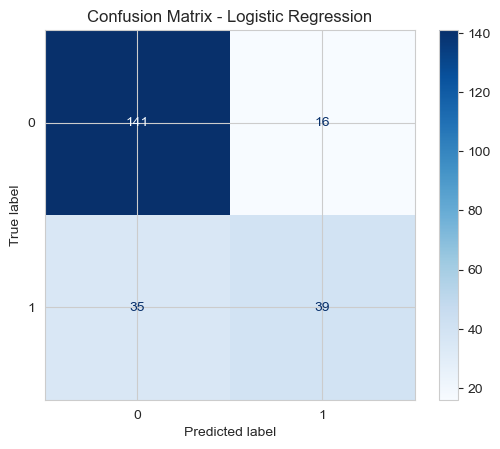

In [18]:
print("Logistic Regression Evaluation:")
print(classification_report(y_test, log_preds))
plot_confusion_matrix(y_test, log_preds, "Logistic Regression")

## Random Forest

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

## Random Forest evaluation

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



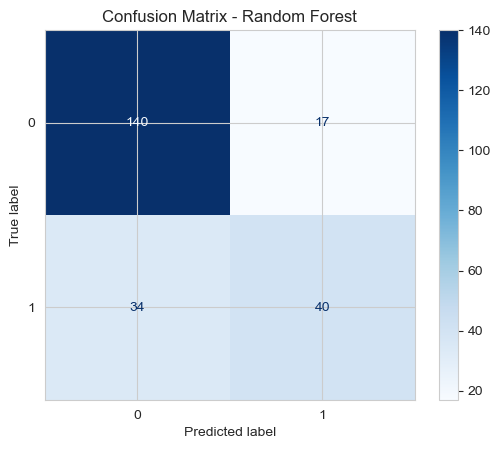

In [20]:
print("Random Forest Evaluation:")
print(classification_report(y_test, rf_preds))
plot_confusion_matrix(y_test, rf_preds, "Random Forest")

## Support Vector Machine

In [21]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)

## SVM evaluation

Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



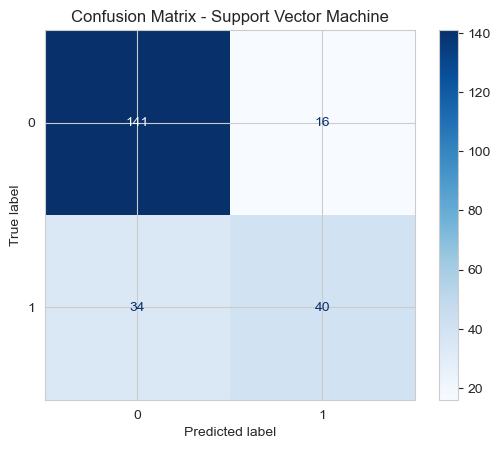

In [22]:
print("Support Vector Machine Evaluation:")
print(classification_report(y_test, svc_preds))
plot_confusion_matrix(y_test, svc_preds, "Support Vector Machine")

## ROC curved

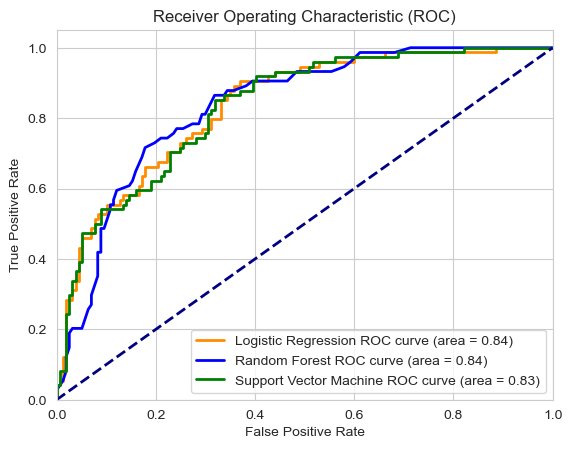

In [23]:
plt.figure()

for model_name, model, color in zip(['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
                                     [log_model, rf_model, svc_model],
                                     ['darkorange', 'blue', 'green']):
    # Calculating ROC curve and AUC
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        probs = model.decision_function(X_test)
        probs = (probs - probs.min()) / (probs.max() - probs.min())

    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()